# Getting Started

This is a tutorial on how to create a figure with our figure generator. 

In this we cover, how to:
- create a simple figure based on grids (subfigures), 
- how to add content, 
- how to add and align multilple grids 

Additional examples can be found in the `tests/` folder.

The following code line is only needed to show the figure result in jupyter. For that we have one additional dependency: pdf2image ([which requires poppler](https://pypi.org/project/pdf2image/)).

In [1]:
from figuregen.util.jupyter import displaypdf, displayhtml, loadhtml

First, we need to import the figure generator.
"util" provides functionality for cropping, tonemapping, error metrics, etc.

In [2]:
import figuregen
from figuregen.util import image
import numpy as np

Then, we need some image data. Here we use solid color images. Typically, the user has their own image data, that they can load and process. 

In [3]:
# define some colors (r,g,b)
yellow=[232, 181, 88]
l_blue=[94, 163, 188]
blue=[82, 110, 186]
orange=[186, 98, 82]

# generate test images
img_blue = np.tile([x / 255 for x in l_blue], (32, 64, 1))
img_yellow = np.tile([x / 255 for x in yellow], (32, 64, 1))
img_orange = np.tile([x / 255 for x in orange], (32, 64, 1))

# load images
images = [
    figuregen.PNG(img_blue),
    figuregen.PNG(img_yellow),
    figuregen.PNG(img_orange)
]

## 1. Creating our first Figure with a simple Grid

Grids are subfigures and allows a grid-like arrangement of images (or plots). The user can define paddings, add content, frames and more.

In the following we create a grid with two rows and three columns and fill it with the images.

In [4]:
n_rows = 2
n_cols = 3
c_grid = figuregen.Grid(num_rows=n_rows, num_cols=n_cols)

# fill grid with image data
for row in range(n_rows):
    for col in range(n_cols):
        c_grid.get_element(row,col).set_image(images[row])

This is the first grid for our figure.
To generate a figure the user provides a list of grids (here one grid), the figure width, and the output filename. The filename extension defines which backend will be used. The figure generator offers three backends: LaTeX (.pdf), HTML (.html) and PPTX (.pptx). In this tutorial we use LaTeX (slowest to generate).

Note: If you want to experiment yourself, we recommend HTML as it is the fastest to generate. Use `displayhtml('figure.html')` instead of `displaypdf('figure.pdf')`.

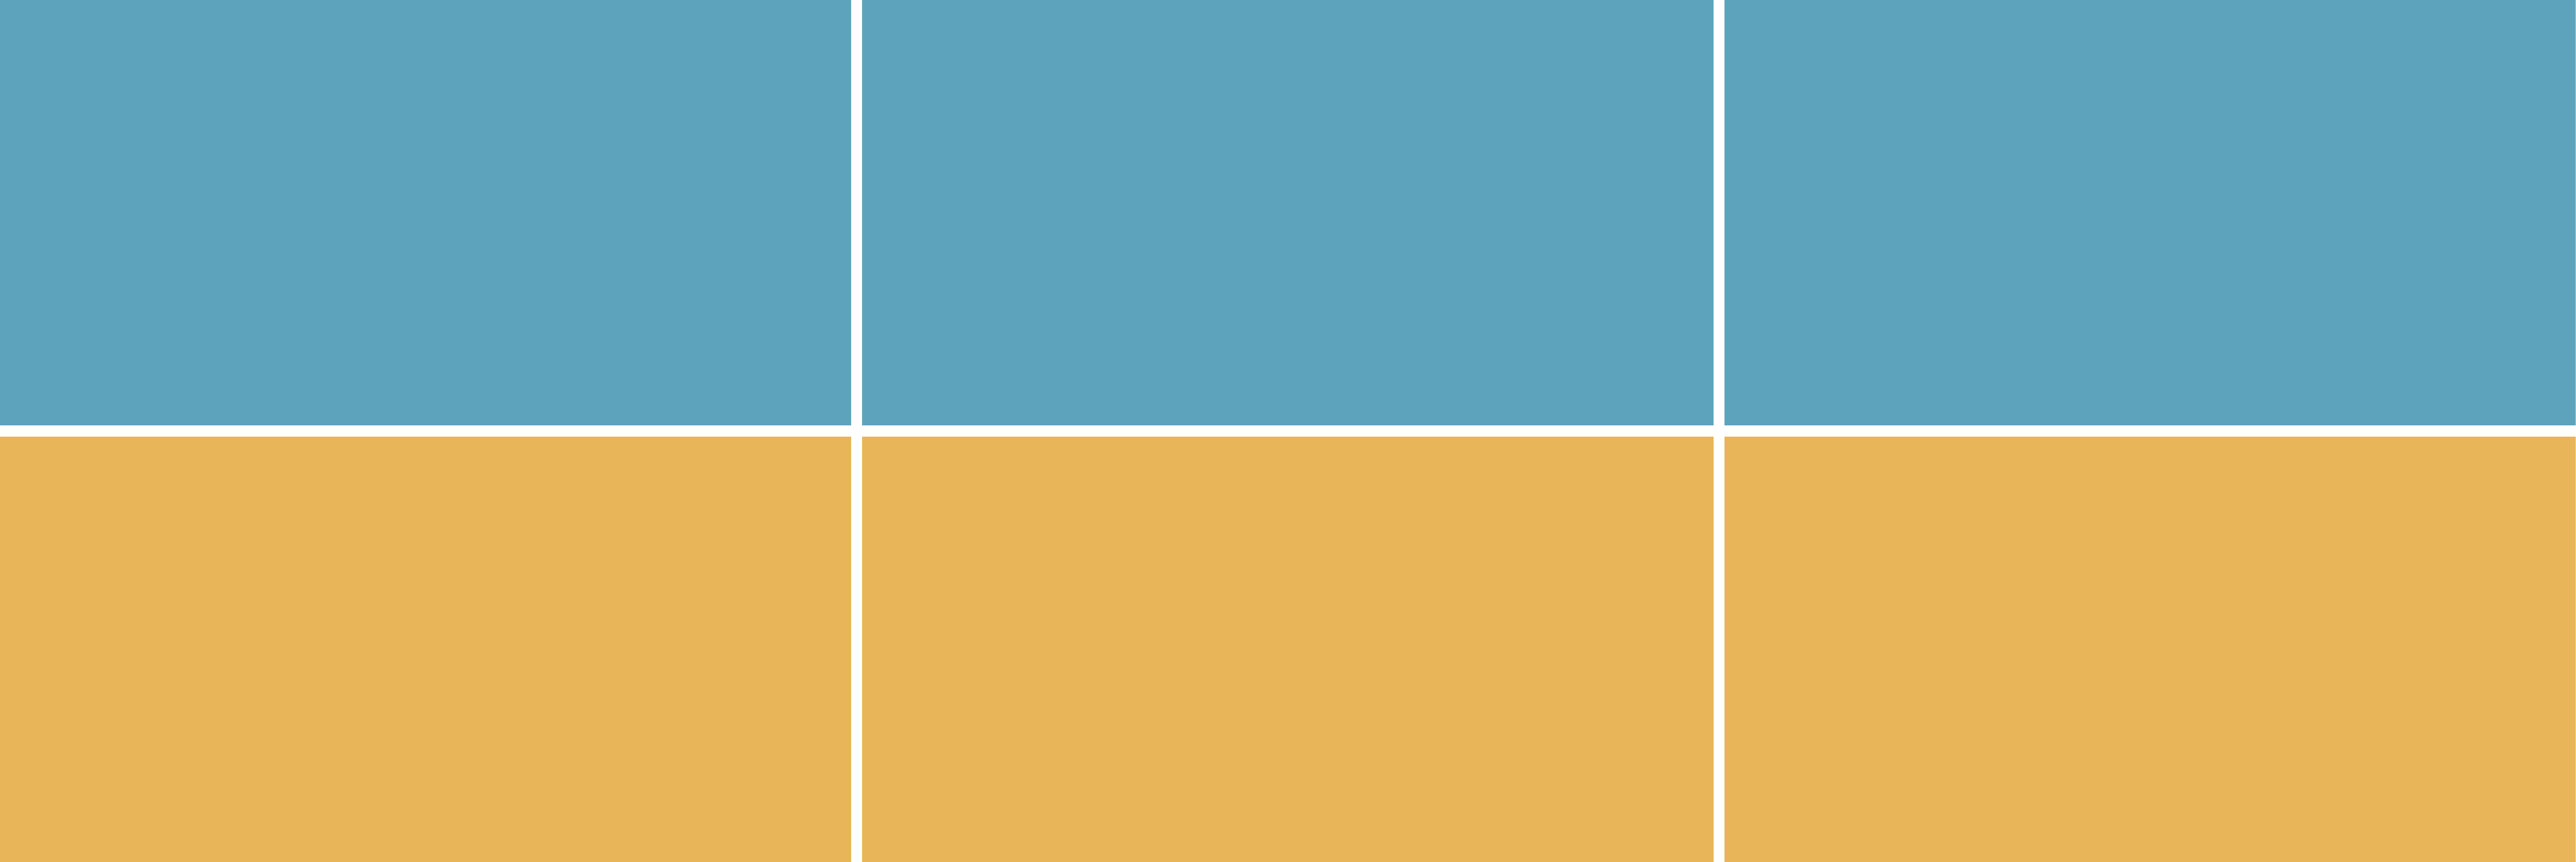

In [5]:
# generate figure
figuregen.horizontal_figure([c_grid], width_cm=18., filename='figure.pdf')
# show figure
displaypdf('figure.pdf')

## 2. How to add and align multiple Grids

Let's add another grid to the previous one!
We do that, by creating a new grid, here, a a 1-by-1, and add that to provided list of grids. 
The order of how the grids are shown are starting from left (first) to right (last).

The user provides the total width of the figure like before.
The figure generator then computes the appropriate size of all grids, such that they are aligned. 

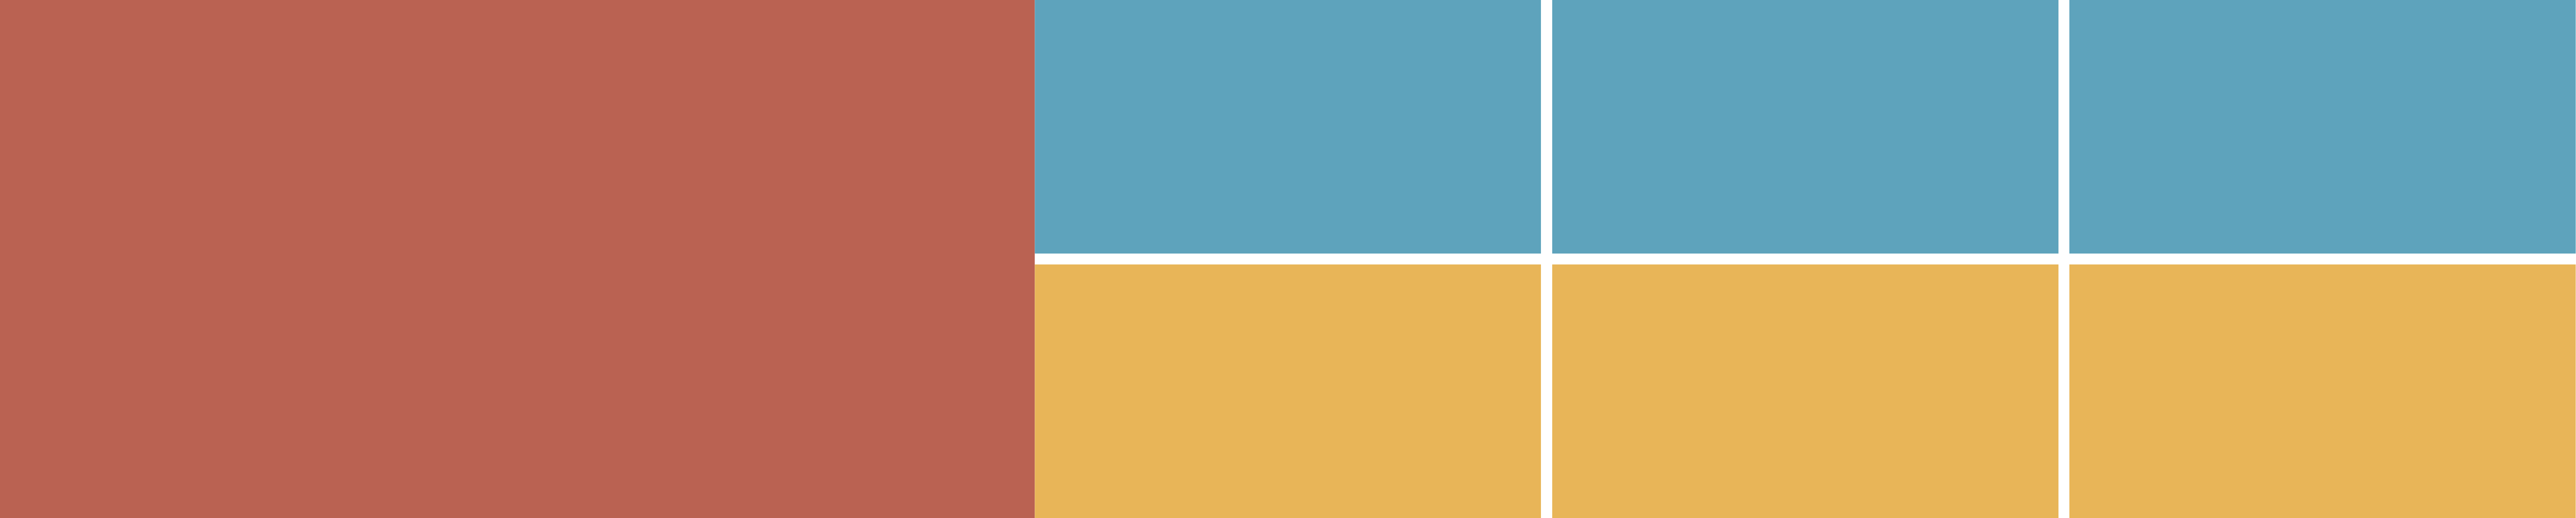

In [6]:
# create a second grid (1-by-1)
ref_grid = figuregen.Grid(num_rows=1, num_cols=1)
ref_img = figuregen.PNG(img_orange)
ref_e = ref_grid.get_element(0,0).set_image(ref_img)

# generate figure with two grids
figuregen.horizontal_figure([ref_grid, c_grid], width_cm=18., filename='figure.pdf')
displaypdf('figure.pdf')

In the following we will add a padding between those two grids. In addition, we overwrite some default paddings for rows and columns of the 2-by-3 grid.

### Layout 
Each grid has it's own layout.
To make sure, that the user does not need to set every little layout-property there exist, we provide a default layout ([generator/default_layouts.py](generator/default_layouts.py)). 
Every value not set, will get the default value within that file. Default values for field_sizes concerning titles are defined in [generator/figuregen.py](generator/figuregen.py). We will discuss titles in section 3.

### Units
Most units are in mm (millimeter, type:float). 
Some are in points (concerning linewidths and fontsizes), or pixels (concerning images, e.g crops and markers).

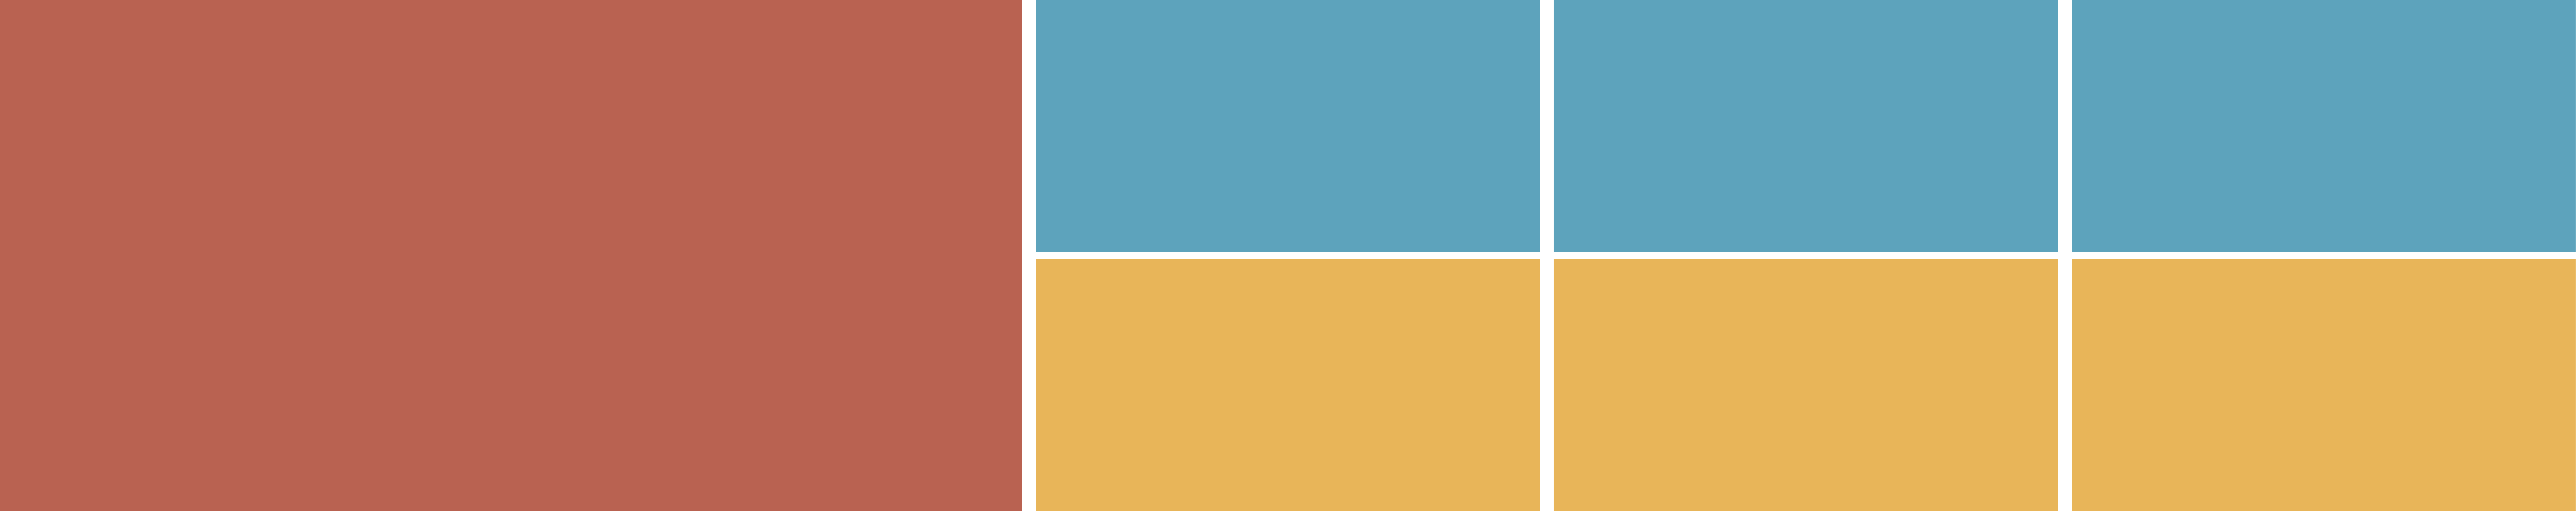

In [7]:

# Specify the paddings for rows and columns (unit: mm), before we had default values
c_lay = c_grid.get_layout()
c_lay.set_padding(row=0.5, column=1.0)

# To get a padding between those grids: set padding right for the left grid
ref_lay = ref_grid.get_layout()
ref_lay.set_padding(right=1.0)

# generate figure
figuregen.horizontal_figure([ref_grid, c_grid], width_cm=18., filename='figure.pdf')
displaypdf("figure.pdf")

Note: You cannot specify the paddings for each column or row in the 2-by-3 grid seperately. 
However, what you could do to achieve that flexbility is to split the 2-by-3 grid. 
Afterwards, you would need to define the paddings accordingly, similar of what we just did.

## 3. How to add Titles

There are several types of titles a grid can have:
- titles, 
- row and column titles,
- captions (titles below each image), and 
- labels (placed on top of an image).

In this section we will show an example for titles and labels. 
If you are interested to see more, we recommend the [tests/single_module.py](tests/single_module.py), which uses all types of titles. 

### Titles
A title has a position and content. 
In total, you have four positions to choose from: 'top', 'left', 'right', and 'bottom'. 
You can have multiple titles; however, you can only have one title at one position. 
In this case, we set a title 'My Title' above the grid.

The user can define how the content will be shown via the corresponding layout functions. 
In this case, we overwrite the defaults for the offset, fontsize, and field_size. 
The 'field_size' for the position 'left'/'right' defines the 'width' of the corresponding text field, while 'top'/'bottom' defines the 'height'. 
We also added a background color to show the offset between the image and content.

If you want to change the font-family, we will show an example at the end of this section.

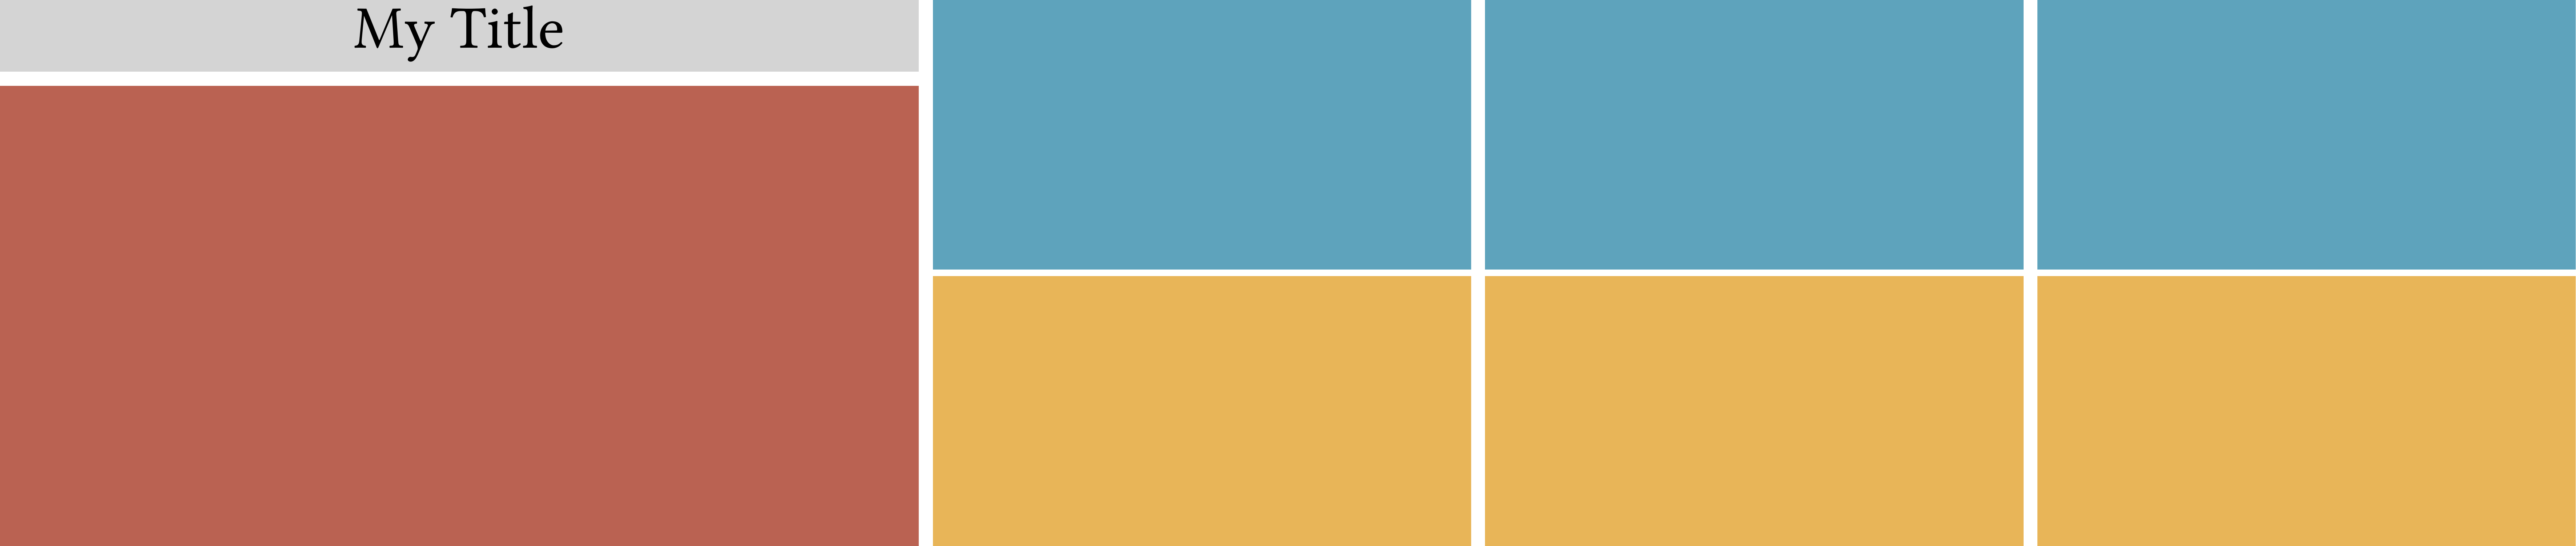

In [8]:
# add a title on top of the reference
ref_grid.set_title('top', 'My Title')
# Specify field_size of the title. 'field_size' is either height oder width, depending on the position (in case for 'top' it is the height).
ref_lay.set_title('top', field_size_mm=5., offset_mm=1., fontsize=12, bg_color=[212,212,212])

# generate figure with two grids
figuregen.horizontal_figure([ref_grid, c_grid], width_cm=18., filename='figure.pdf')
displaypdf("figure.pdf")


Let's align the top edge of the right hand images with the left hand one. 
We also remove the background of the title.

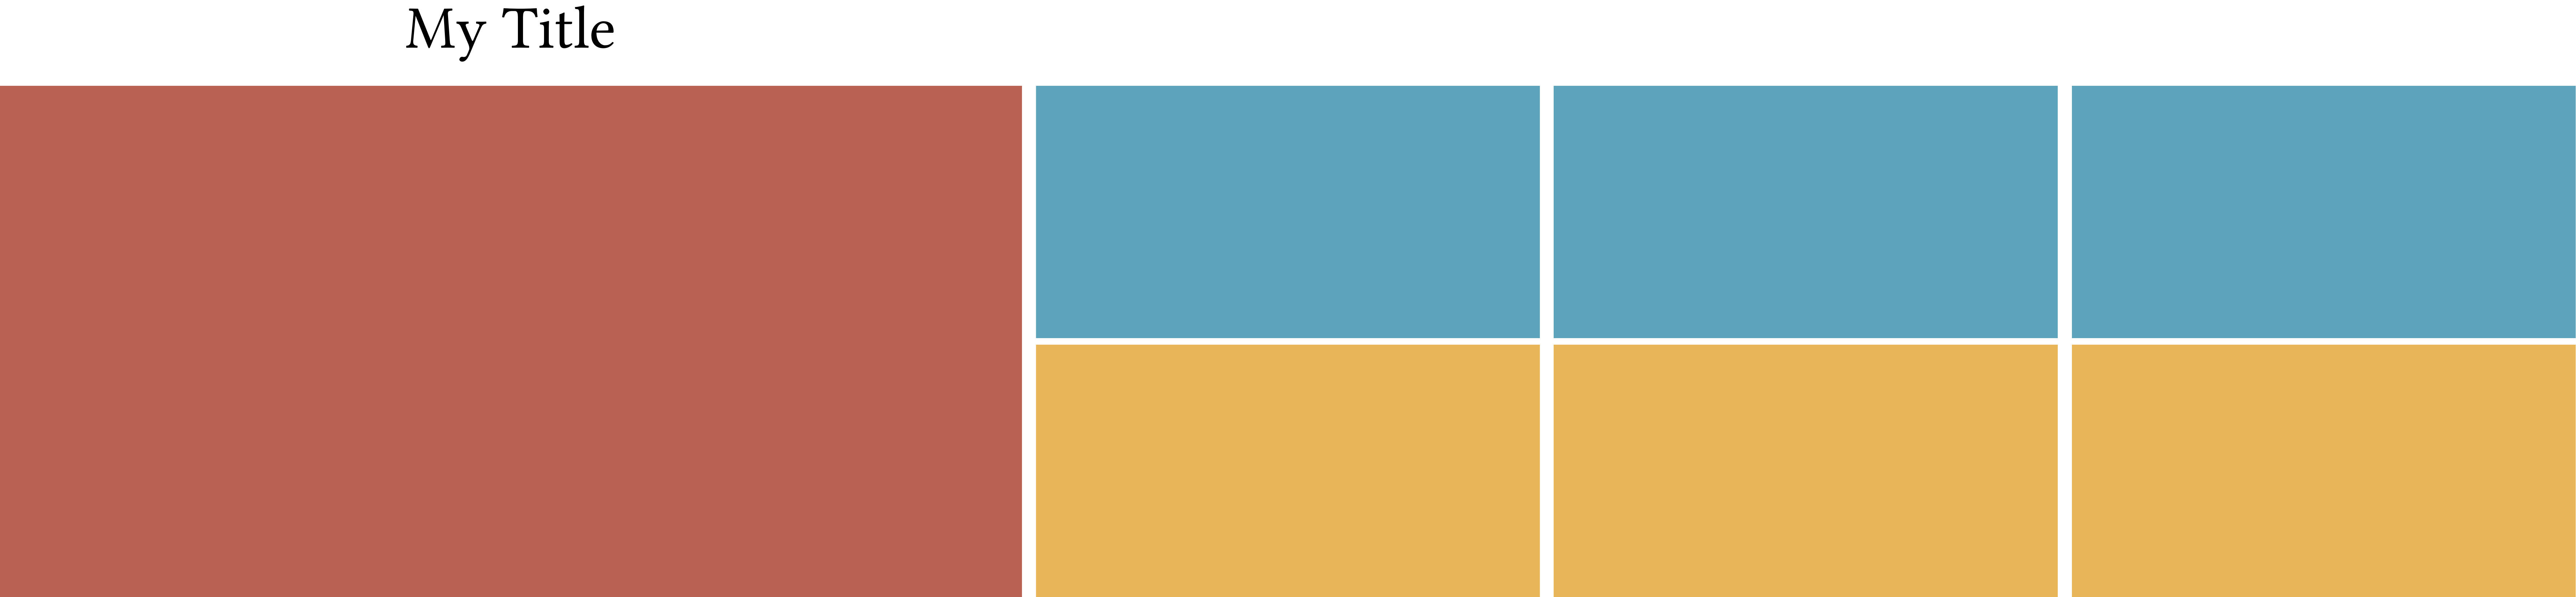

In [9]:
c_lay.set_padding(top=6.) # = field_size (5.0) + offset (1.0) of reference title

# remove background color
ref_lay.set_title('top', field_size_mm=5., offset_mm=1., fontsize=12, bg_color=[255,255,255])

# generate figure
figuregen.horizontal_figure([ref_grid, c_grid], width_cm=18., filename='figure.pdf')
displaypdf("figure.pdf")

### Labels
Labels can be placed on top of images. 
Similar to titles, you can have multiple labels on one image, but not on the same position. Each image has six label positions: "top_left", "top_center", "top_right", "bottom_left", and so on. Therefore, you can have up to six labels on each image.
Labels differs from titles as they do not have a corresponding layout function to apply the usual settings.

Note: If the label position is in the corner (not 'center'), the offset needs to be a tuple of floats, which defines the offset in 'width' and 'height' in mm. In case the label position is the 'center', the first value of the tuple defines the offset - the user can also provide a single value, as the second value will be ignored in this case. 

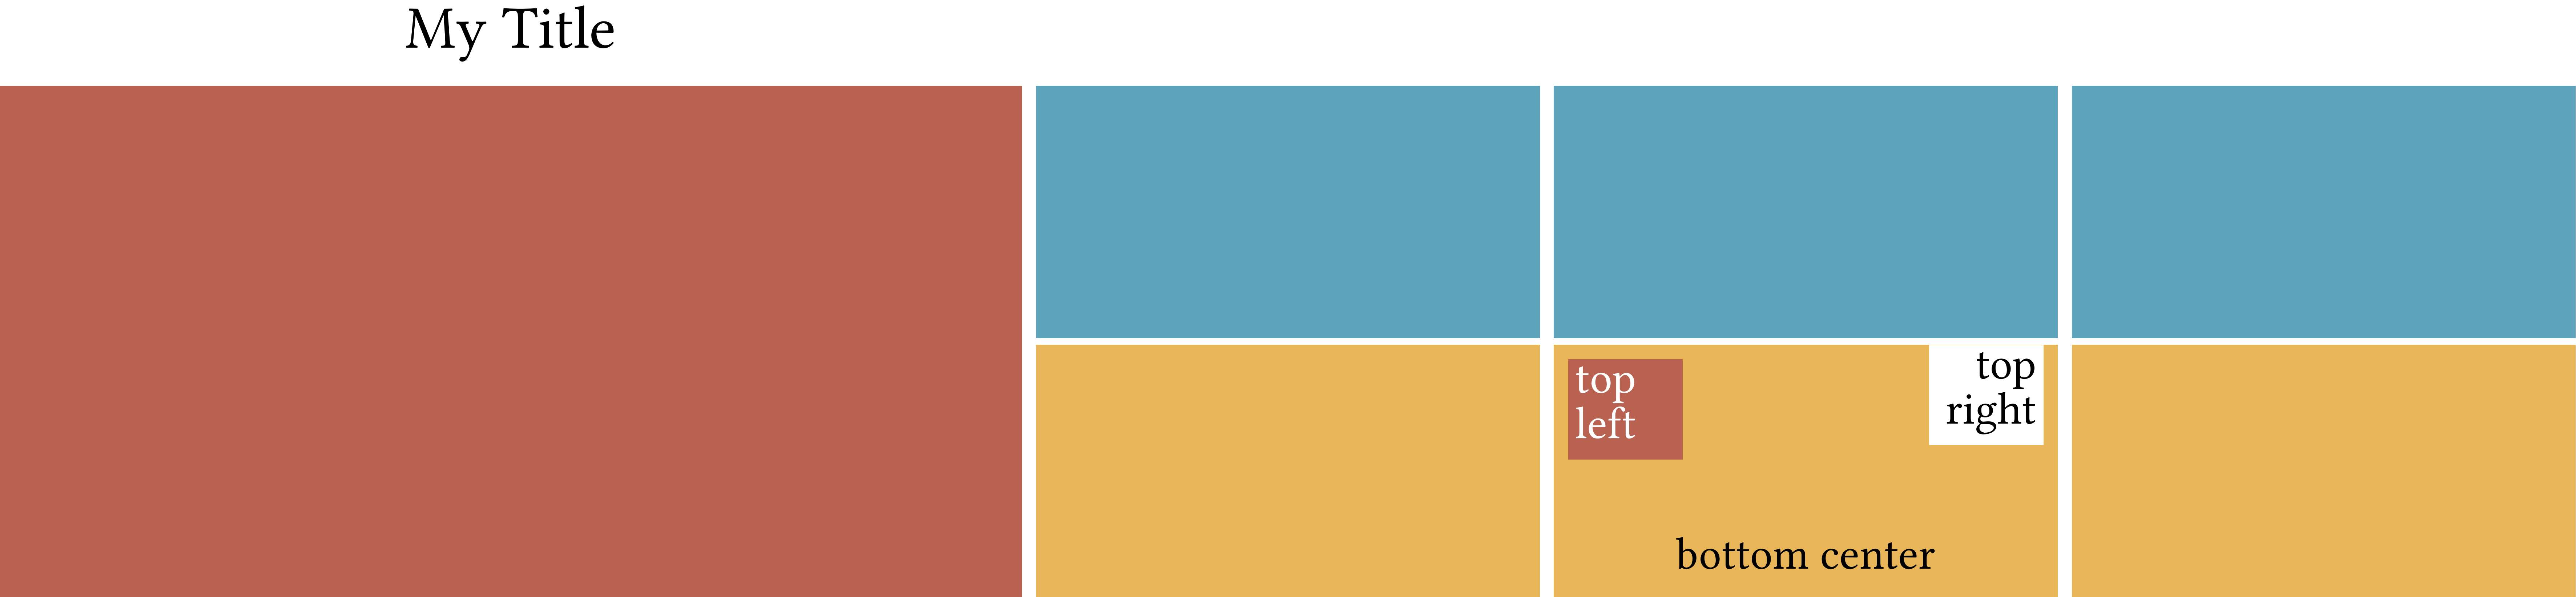

In [10]:
# labels (examples, each element can have in total 6 labels on each valid position)
e1 = c_grid.get_element(1,1)
e1.set_label("bottom center", pos='bottom_center', width_mm=25., height_mm=4.0, offset_mm=[1.0, 1.0], 
                  fontsize=9, bg_color=None)
e1.set_label("top\\\\right", pos='top_right', width_mm=8., height_mm=7.0, offset_mm=[1.0, 0.0], 
                  fontsize=9, bg_color=[255,255,255])
e1.set_label(r"top\\left", pos='top_left', width_mm=8., height_mm=7.0, offset_mm=[1.0, 1.0], 
                  fontsize=9, bg_color=orange, txt_color=[255,255,255])

# generate figure
figuregen.horizontal_figure([ref_grid, c_grid], width_cm=18., filename='figure.pdf')
displaypdf("figure.pdf")

### Fonts
In the LaTeX-backend you can also change fonts and import other packages you need. Here, we overwrite the font-packages and use LaTeX commands to make the title bold. Naturally, LaTeX commands don't work for other backends. Same applies for HTML commands.

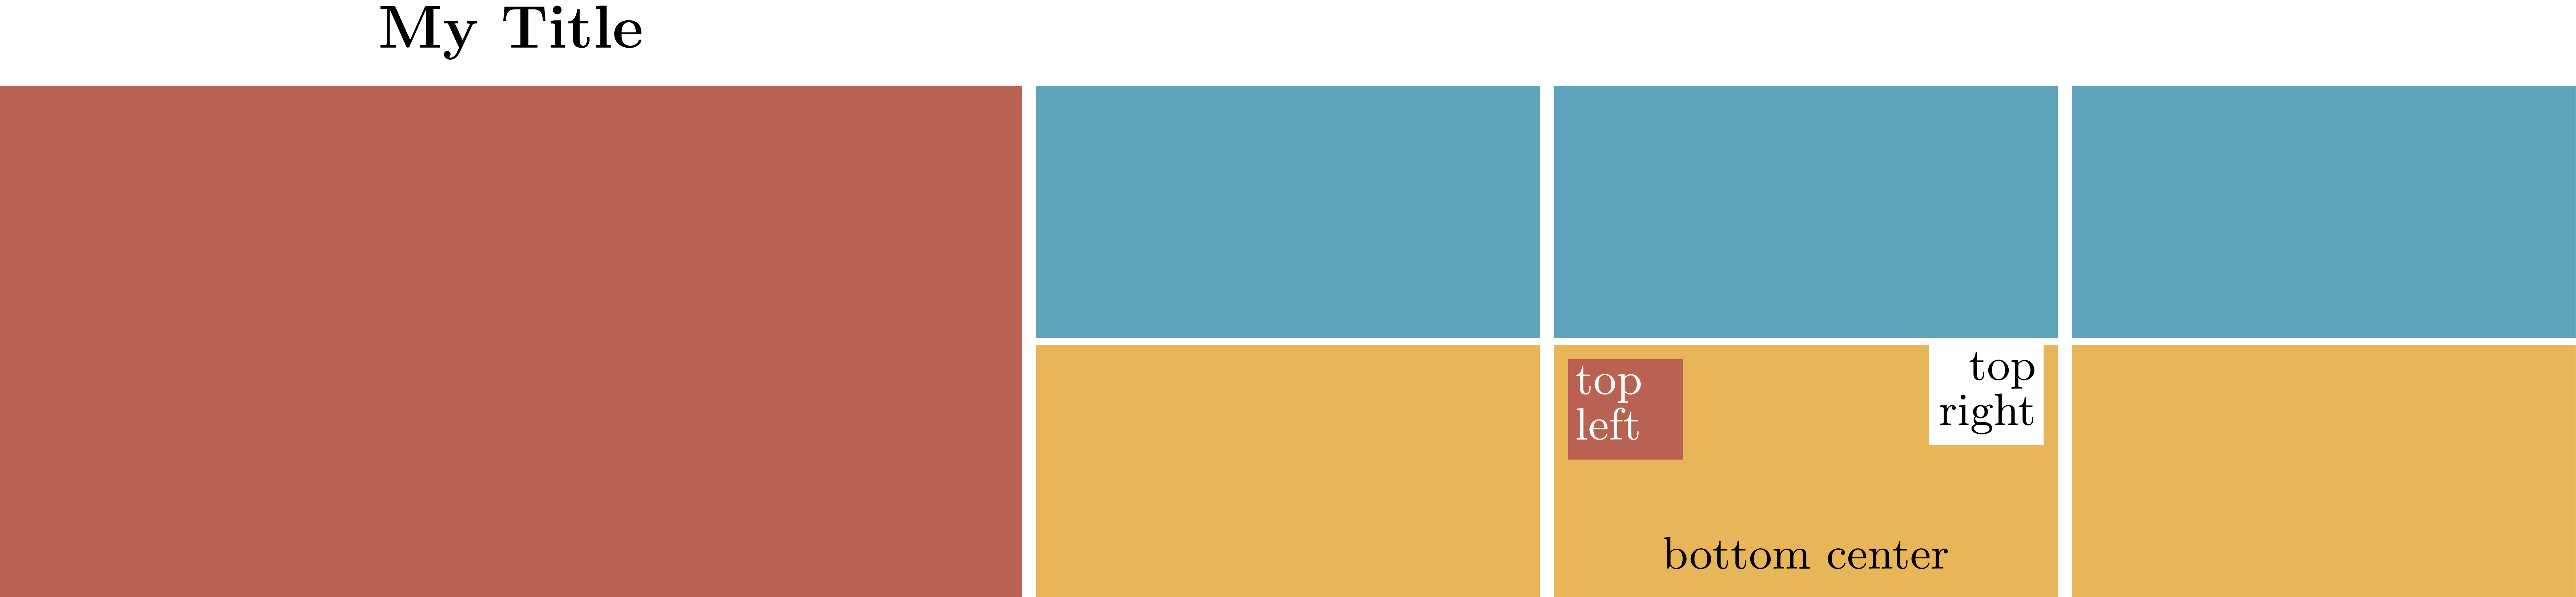

In [11]:
# make the title bold
ref_grid.set_title('top', r'\textbf{My Title}')

# create figure 
figuregen.horizontal_figure([ref_grid, c_grid], width_cm=18., filename='figure.pdf', tex_packages=['[T1]{fontenc}', '{arial}'])
displaypdf("figure.pdf")

Just like you can provide `tex_packages` (optional), you can also provide an argument to save LaTeX output files (`intermediate_dir`, e.g. `intermediate_dir`='some_folder'). This can be especially helpful for debugging.

## 4. How to stack Figures

We have shown how to put grids side-by-side.
Now, we will show you how you can put grids on top of each other (vertical stack).

The main differences are, that the user needs to provide a list of lists of grids, and that he needs to call `figure` instead of `horizontal_figure`.


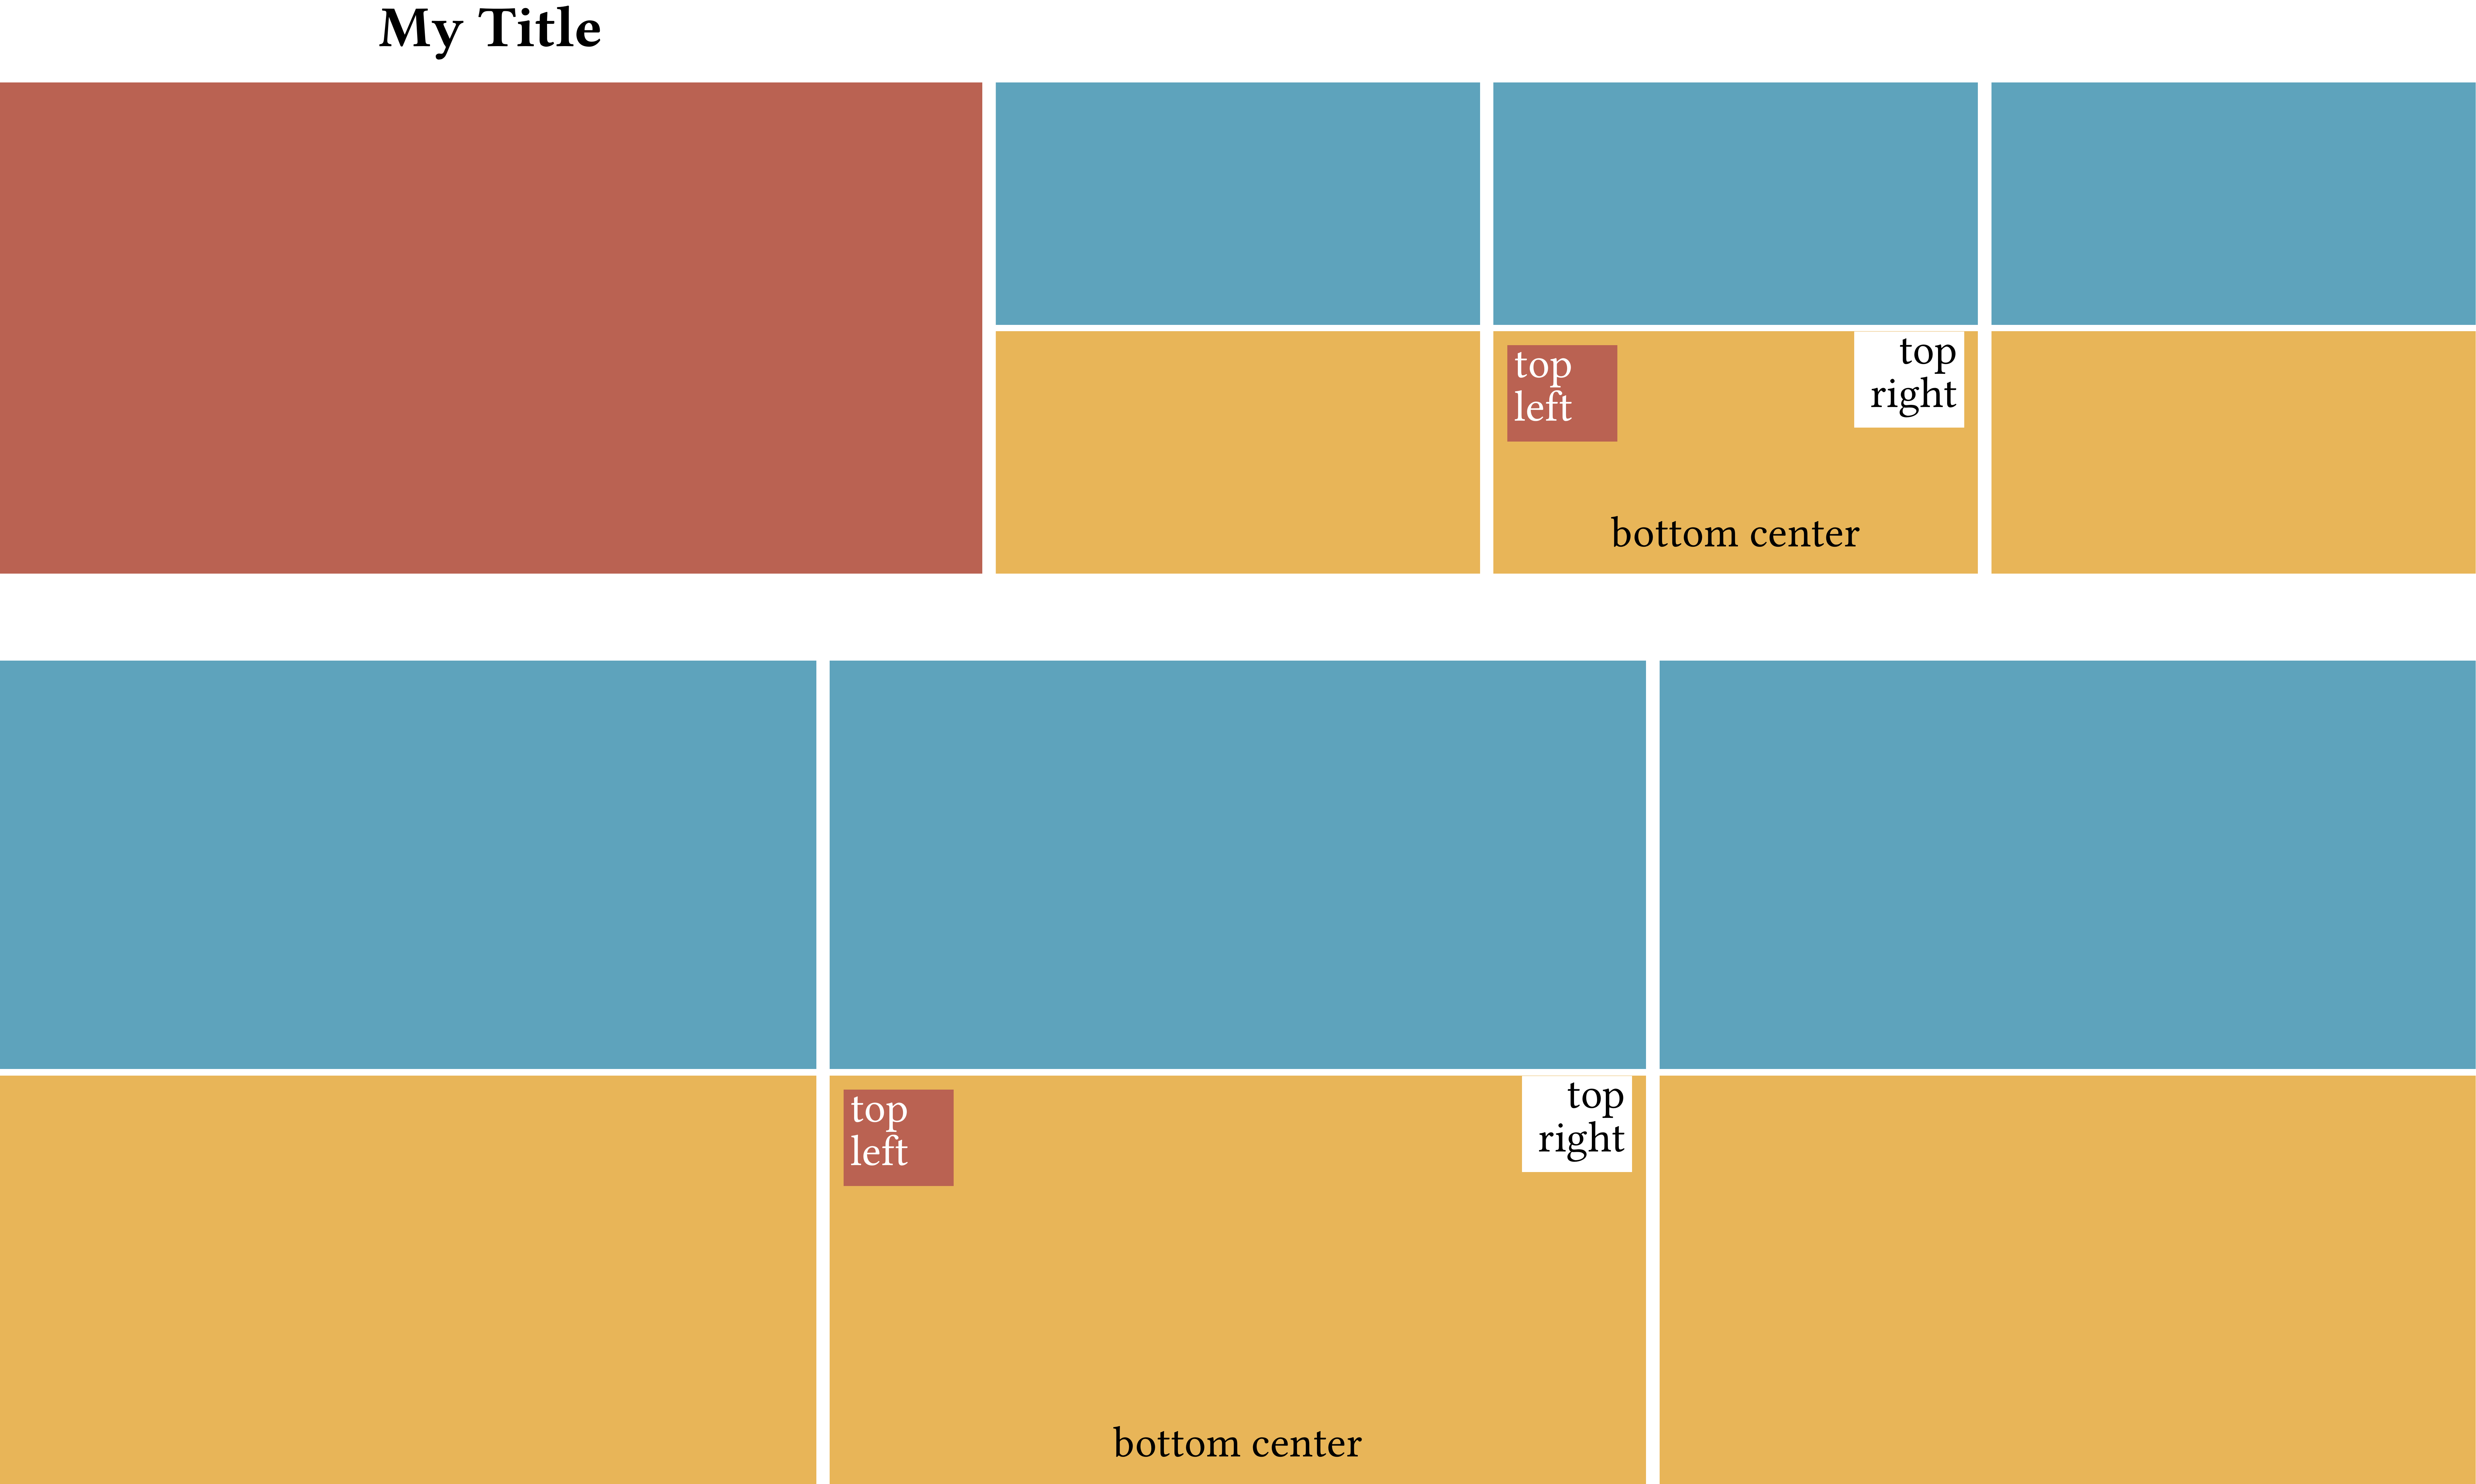

In [12]:
v_stacked = [
    [ref_grid, c_grid],
    [c_grid]
]

# create figure 
figuregen.figure(v_stacked, width_cm=18., filename='figure.pdf')
displaypdf("figure.pdf")

So, these are the basic concepts of our figure generator.

If you are interested in a more realistic example, that also includes:
- frames,
- (rectangle) markers on top of an image,
- util functions: 'Cropbox' and 'relative MSE'

... you can click on the image below or [tests/vertical_stack.py](tests/vertical_stack.py), which leads to the test that created the corresponding figure.

[<img src="tests/vertical-stack.png" />](tests/vertical_stack.py)
